In [ ]:
# Importing necesarry libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import yfinance as yf # Importing finance stock datasets
import matplotlib.pyplot as plt

In [ ]:
from pandas_datareader import DataReader
from pandas_datareader import data as pdr

In [ ]:
from datetime import datetime

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Code that might trigger warnings

# Reset warnings filter (optional)
warnings.resetwarnings()

# Case 1: Large Dataset

In [ ]:
start = "2007-01-01"
end = "2023-07-31"

# Convert start and end dates to datetime objects
start_date = datetime.strptime(start, "%Y-%m-%d")
end_date = datetime.strptime(end, "%Y-%m-%d")

# Set up the data reader with Yahoo Finance
yf.pdr_override()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Making an array for different stock prices from tech industry
# AAPL - Apple
# MSFT - Microsoft
# AMZN - Amazon
# NFLX - Netflix
# INFY - Infosys
# ADBE - Adobe
# GOOGL - Google (Class A - gives voting rights)
# NVDA - NVIDIA Corporation

stock_types = ["AAPL", "MSFT", "AMZN", "NFLX", "INFY", "ADBE", "GOOGL", "NVDA"]

In [ ]:
# Making stock dictionary to be able to call any stock easily
stock_dict = {}
for stock in stock_types:
  stock_dict[stock] = None

Importing DataFrame from yfinance

In [ ]:
for stock in stock_dict:
  # Fetch the data using DataReader
  df = pdr.get_data_yahoo(stock, start=start_date, end=end_date)
  df = df.reset_index()

  if df is not None:
    stock_dict[stock] = df
    print(stock + "-" )
    print(df.head())  # Display the first few rows of the loaded data

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


[*********************100%%**********************]  1 of 1 completed

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp


AAPL-
        Date      Open      High       Low     Close  Adj Close      Volume
0 2007-01-03  3.081786  3.092143  2.925000  2.992857   2.540326  1238319600
1 2007-01-04  3.001786  3.069643  2.993571  3.059286   2.596711   847260400
2 2007-01-05  3.063214  3.078571  3.014286  3.037500   2.578219   834741600
3 2007-01-08  3.070000  3.090357  3.045714  3.052500   2.590951   797106800
4 2007-01-09  3.087500  3.320714  3.041071  3.306071   2.806182  3349298400
[*********************100%%**********************]  1 of 1 completed
MSFT-
        Date       Open       High        Low      Close  Adj Close    Volume
0 2007-01-03  29.910000  30.250000  29.400000  29.860001  21.480507  76935100
1 2007-01-04  29.700001  29.969999  29.440001  29.809999  21.444534  45774500
2 2007-01-05  29.629999  29.750000  29.450001  29.639999  21.322245  44607200
3 2007-01-08  29.650000  30.100000  29.530001  29.930000  21.530863  50220200
4 2007-01-09  30.000000  30.180000  29.730000  29.959999  21.552439  446

Splliting training and Testing Data

In [ ]:
# checking shape of a random stock dataset
stock_dict["AAPL"].shape[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4171

In [ ]:
import math

In [ ]:
# Finding training dataset size and splitting accordingly
training_len = math.ceil(0.8 * stock_dict["AAPL"].shape[0])
training_len

3337

In [ ]:
stock_dict["AAPL"]

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,3.081786,3.092143,2.925000,2.992857,2.540326,1238319600
1,2007-01-04,3.001786,3.069643,2.993571,3.059286,2.596711,847260400
2,2007-01-05,3.063214,3.078571,3.014286,3.037500,2.578219,834741600
3,2007-01-08,3.070000,3.090357,3.045714,3.052500,2.590951,797106800
4,2007-01-09,3.087500,3.320714,3.041071,3.306071,2.806182,3349298400
...,...,...,...,...,...,...,...
4166,2023-07-24,193.410004,194.910004,192.250000,192.750000,192.490067,45377800
4167,2023-07-25,193.330002,194.440002,192.919998,193.619995,193.358887,37283200
4168,2023-07-26,193.669998,195.639999,193.320007,194.500000,194.237701,47471900
4169,2023-07-27,196.020004,197.199997,192.550003,193.220001,192.959427,47460200


In [ ]:
stock_training_dict = {}

for stock in stock_dict:
  stock_training_dict[stock] = stock_dict[stock].iloc[0:training_len, : ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Checking training data
stock_training_dict["AAPL"]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,3.081786,3.092143,2.925000,2.992857,2.540326,1238319600
1,2007-01-04,3.001786,3.069643,2.993571,3.059286,2.596711,847260400
2,2007-01-05,3.063214,3.078571,3.014286,3.037500,2.578219,834741600
3,2007-01-08,3.070000,3.090357,3.045714,3.052500,2.590951,797106800
4,2007-01-09,3.087500,3.320714,3.041071,3.306071,2.806182,3349298400
...,...,...,...,...,...,...,...
3332,2020-03-30,62.685001,63.880001,62.349998,63.702499,62.290257,167976400
3333,2020-03-31,63.900002,65.622498,63.000000,63.572498,62.163139,197002000
3334,2020-04-01,61.625000,62.180000,59.782501,60.227501,58.892307,176218400
3335,2020-04-02,60.084999,61.287498,59.224998,61.232498,59.875019,165934000


In [ ]:
stock_training_dict["AAPL"].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Adj Close,Volume
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3.337000e+03
mean,23.336284,23.564989,23.108001,23.345110,21.477420,4.323383e+08
std,16.949162,17.127693,16.804182,16.977813,16.658129,3.872279e+08
min,2.835357,2.928571,2.792857,2.792857,2.370568,4.544800e+07
25%,8.703929,8.806071,8.587857,8.685714,7.372404,1.429960e+08
50%,20.151787,20.330357,19.945356,20.139286,17.323330,3.122924e+08
75%,32.099998,32.347500,31.862499,32.147499,28.952929,5.957420e+08
max,81.184998,81.962502,80.837502,81.800003,79.986565,3.372970e+09


In [ ]:
# Checking each stock data to avoid any null value
for stock in stock_training_dict:
  print(stock + "-")
  print(stock_training_dict[stock].isna().sum())
  print()

AAPL-
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

MSFT-
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

AMZN-
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

NFLX-
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

INFY-
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

ADBE-
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

GOOGL-
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

NVDA-
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


AAPL -


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


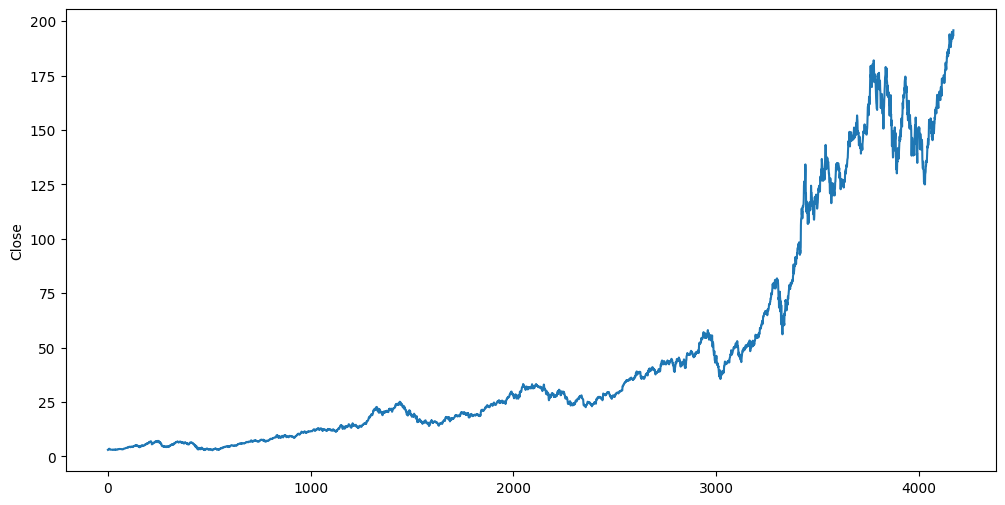

MSFT -


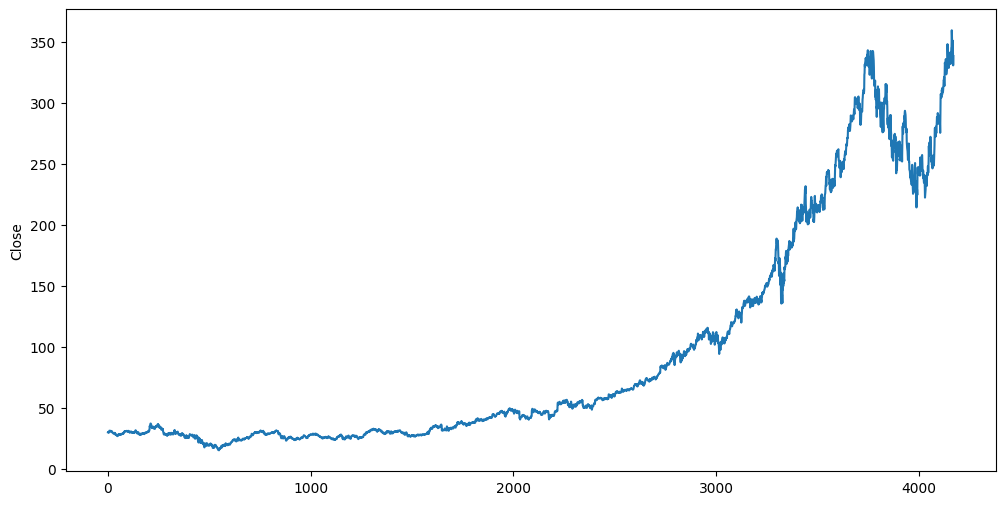

AMZN -


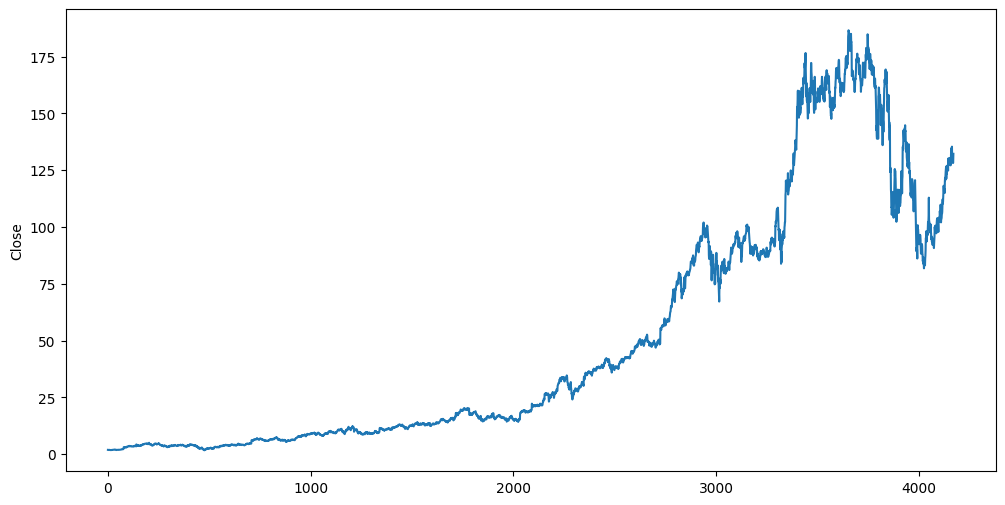

NFLX -


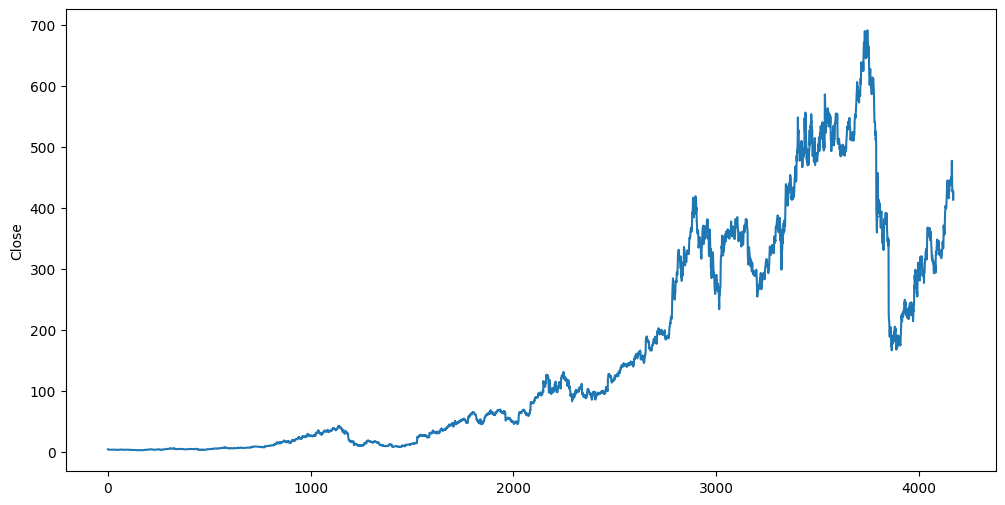

INFY -


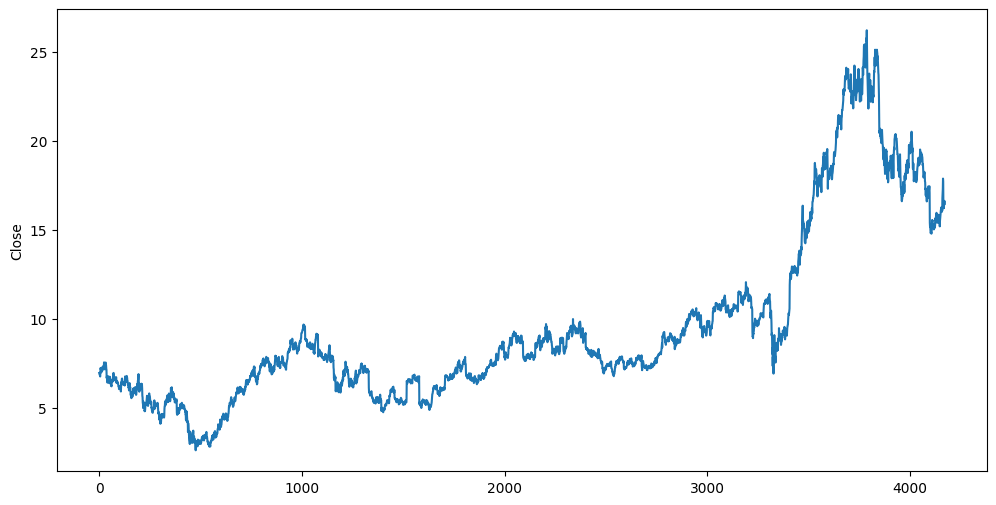

ADBE -


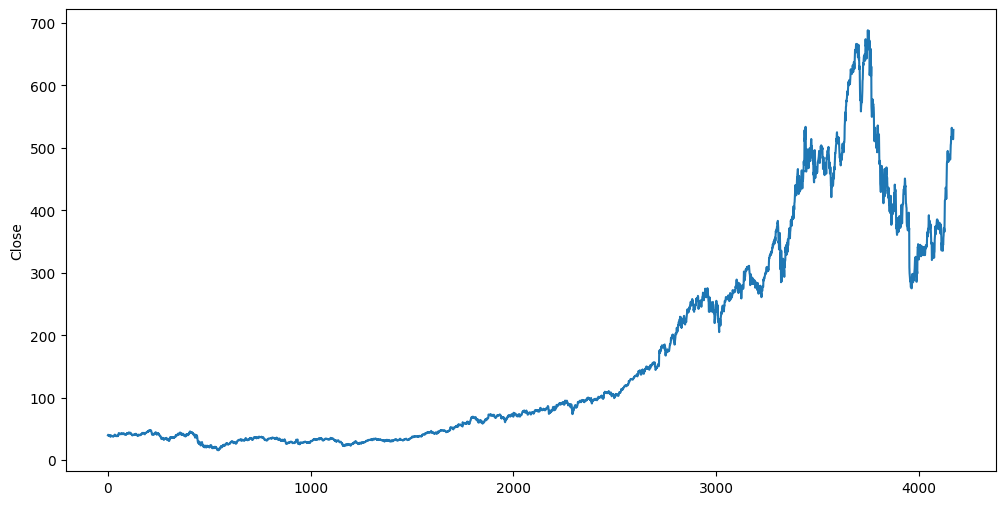

GOOGL -


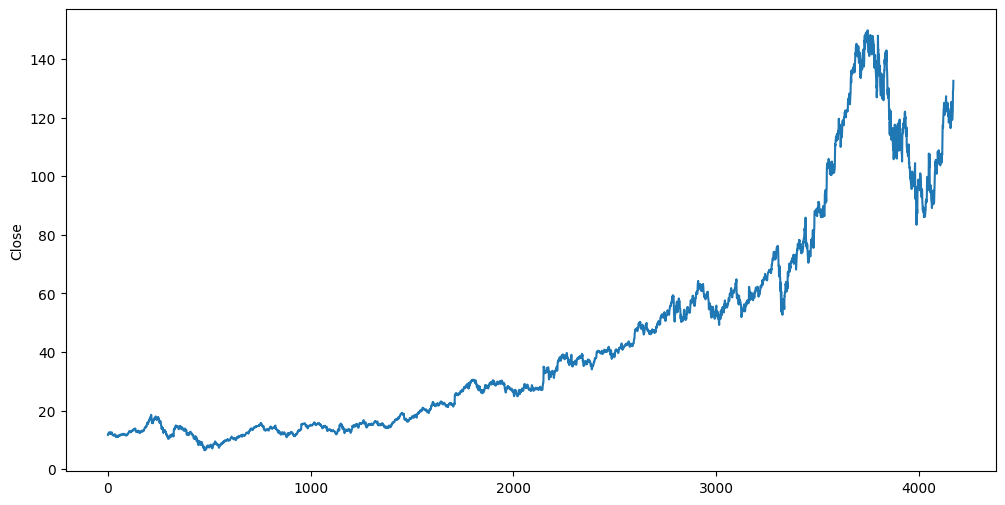

NVDA -


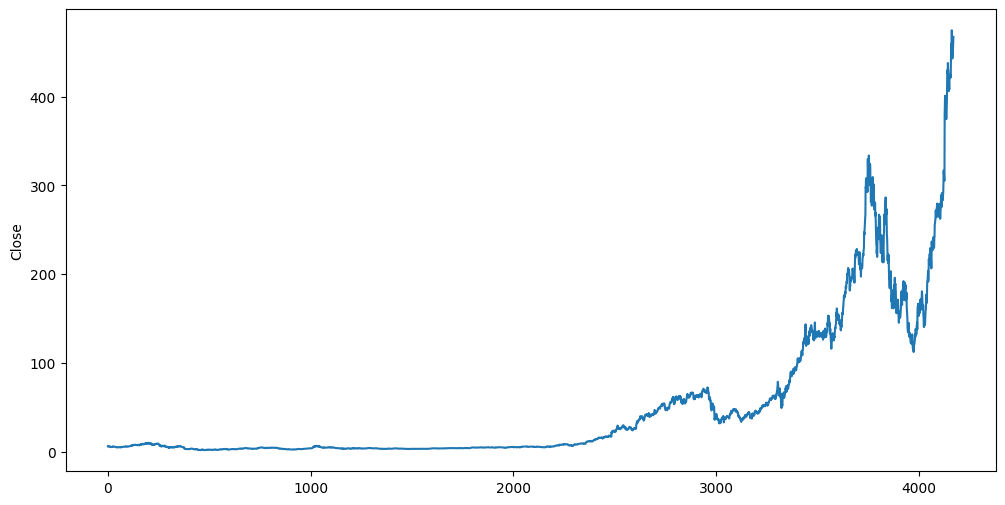

In [ ]:
# Plotting graph of each stock
for stock in stock_training_dict:
  # here we are visualising of closing price
  plt.figure(figsize=(12, 6))

  print(stock + ' -')

  stock_dict[stock]['Close'].plot()
  plt.ylabel('Close')
  plt.xlabel(None)
  plt.show()

Making data according to prohpet model needs

In [ ]:
for stock in stock_training_dict:
  # Select only the important features i.e. the date and price
  stock_training_dict[stock] = stock_training_dict[stock][["Date","Close"]] # select Date and Price
  # Rename the features: These names are NEEDED for the model fitting
  stock_training_dict[stock] = stock_training_dict[stock].rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset

  print(stock + ' -')
  print(stock_training_dict[stock].head())

AAPL -
          ds         y
0 2007-01-03  2.992857
1 2007-01-04  3.059286
2 2007-01-05  3.037500
3 2007-01-08  3.052500
4 2007-01-09  3.306071
MSFT -
          ds          y
0 2007-01-03  29.860001
1 2007-01-04  29.809999
2 2007-01-05  29.639999
3 2007-01-08  29.930000
4 2007-01-09  29.959999
AMZN -
          ds       y
0 2007-01-03  1.9350
1 2007-01-04  1.9450
2 2007-01-05  1.9185
3 2007-01-08  1.8750
4 2007-01-09  1.8890
NFLX -
          ds         y
0 2007-01-03  3.801429
1 2007-01-04  3.621429
2 2007-01-05  3.544286
3 2007-01-08  3.404286
4 2007-01-09  3.427143
INFY -
          ds       y
0 2007-01-03  6.9775
1 2007-01-04  6.9250
2 2007-01-05  6.8925
3 2007-01-08  6.8750
4 2007-01-09  6.8250
ADBE -
          ds          y
0 2007-01-03  39.919998
1 2007-01-04  40.820000
2 2007-01-05  40.619999
3 2007-01-08  40.450001
4 2007-01-09  39.630001
GOOGL -
          ds          y
0 2007-01-03  11.701451
1 2007-01-04  12.093594
2 2007-01-05  12.191942
3 2007-01-08  12.101602
4 2007-01-09  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Importing FB-Prophet
from prophet import Prophet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

In [ ]:
stock_models = {}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for stock in stock_training_dict:

  m = Prophet(daily_seasonality = True) # the Prophet class (model)
  m.fit(stock_training_dict[stock]) # fit the model using all data

  stock_models[stock] = m

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwaqxwygz/odcfwqzm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwaqxwygz/_1pjteh6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3710', 'data', 'file=/tmp/tmpwaqxwygz/odcfwqzm.json', 'init

In [ ]:
predictions_dict = {}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


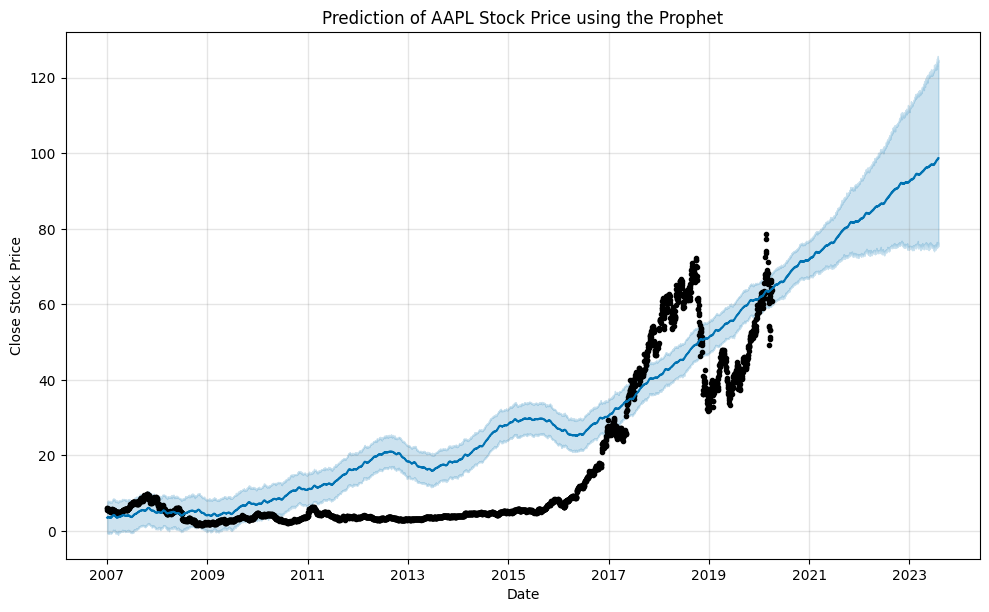

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


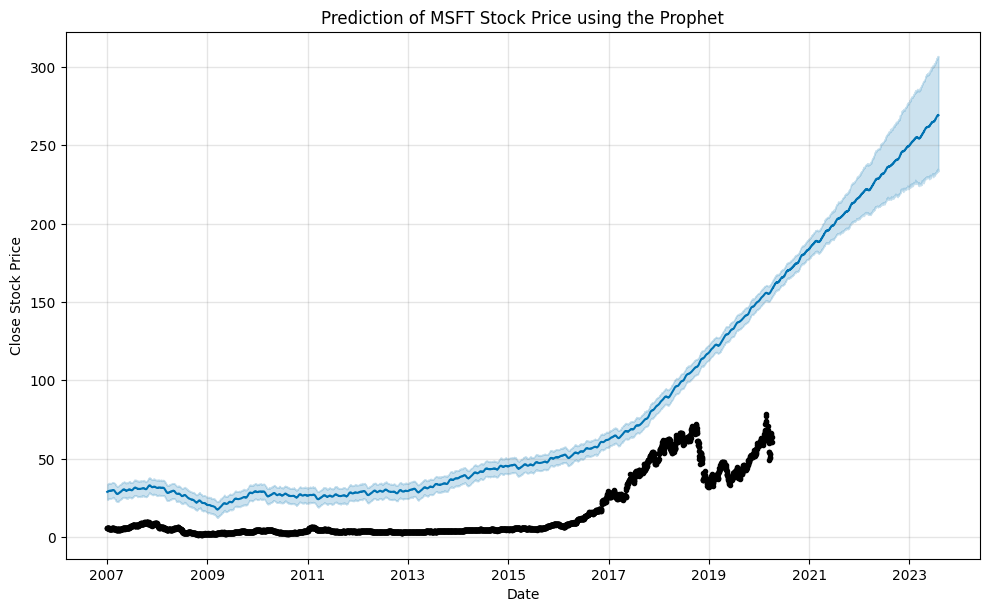

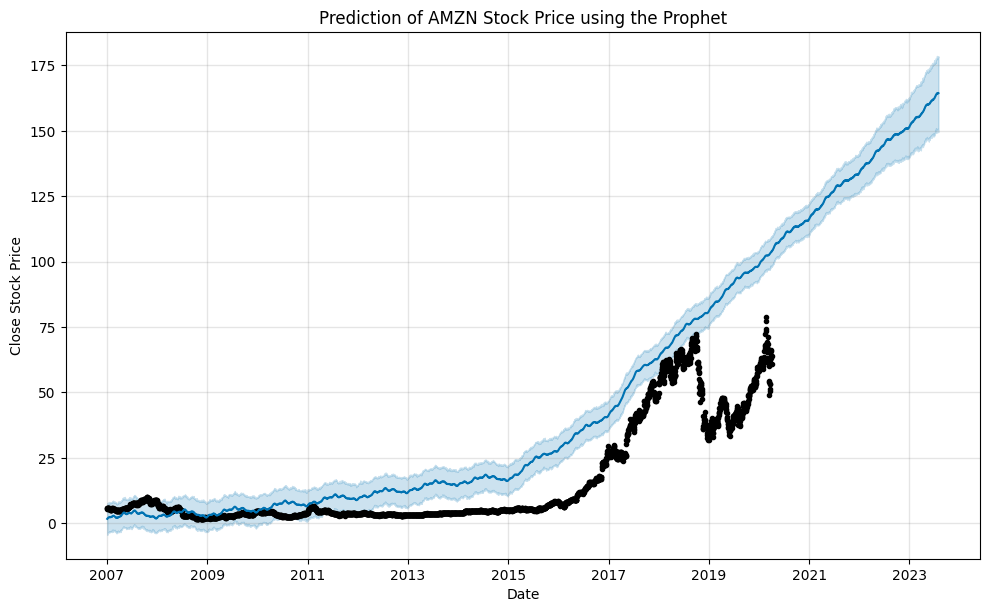

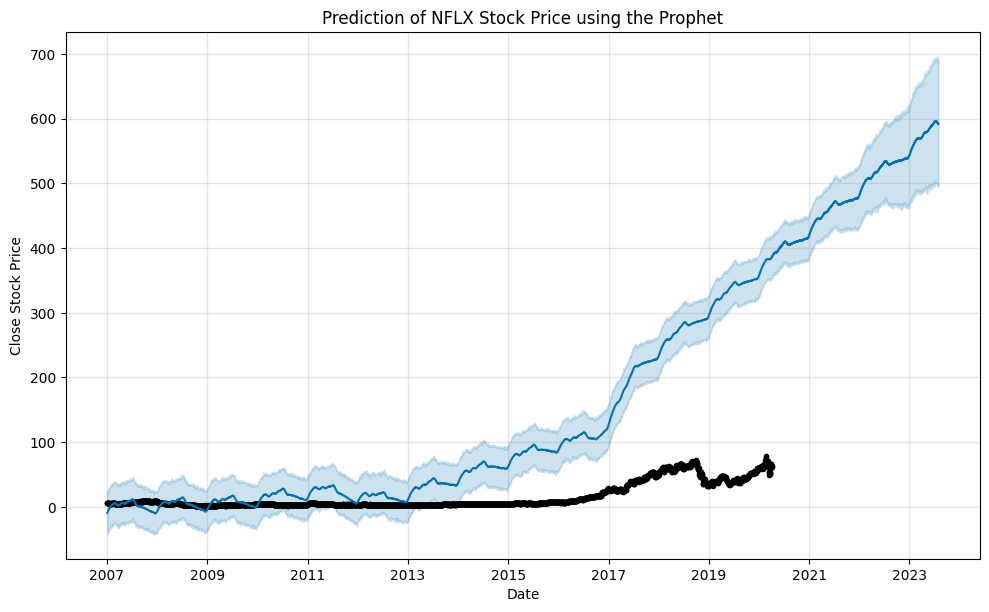

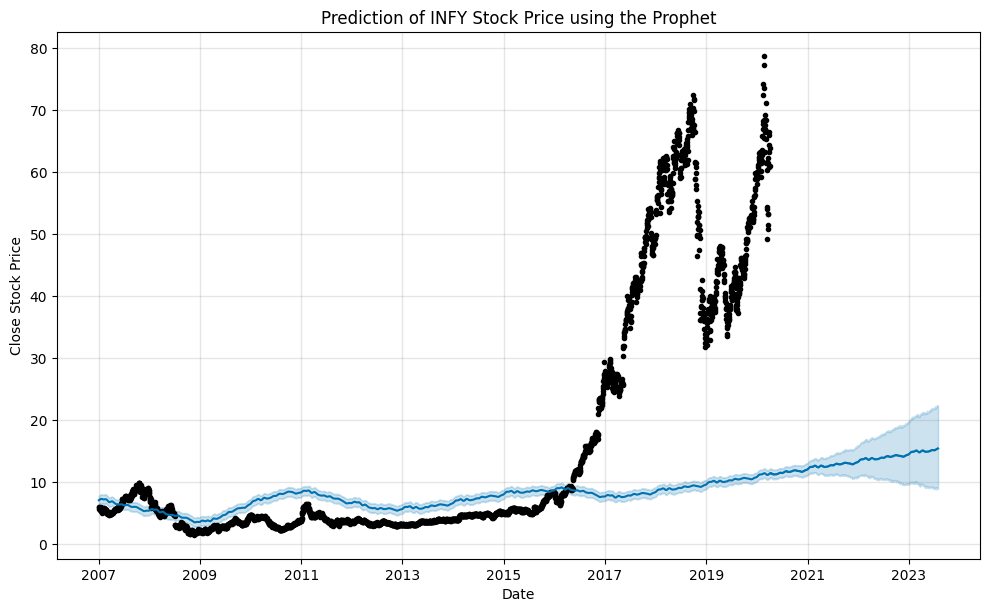

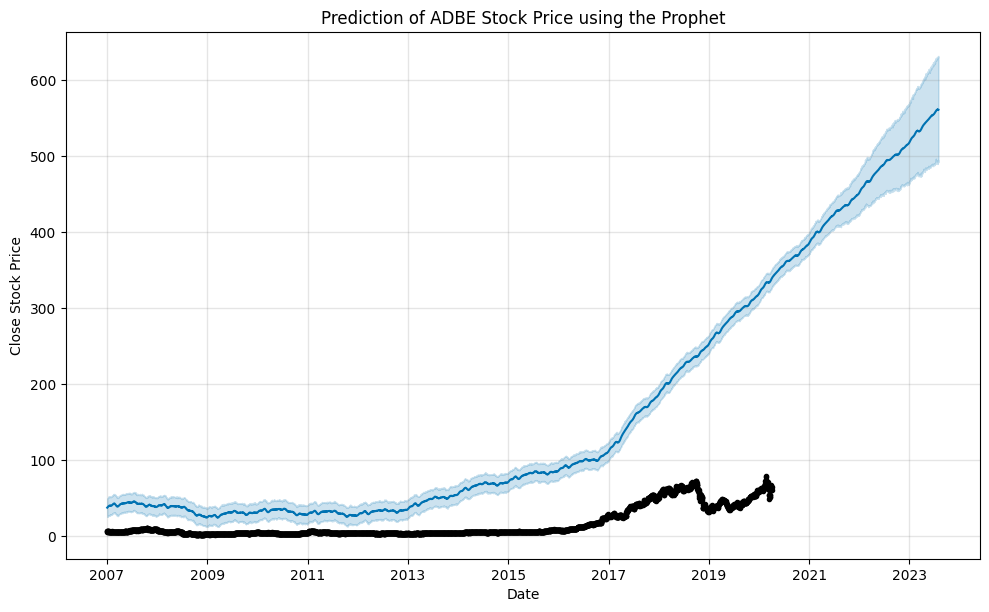

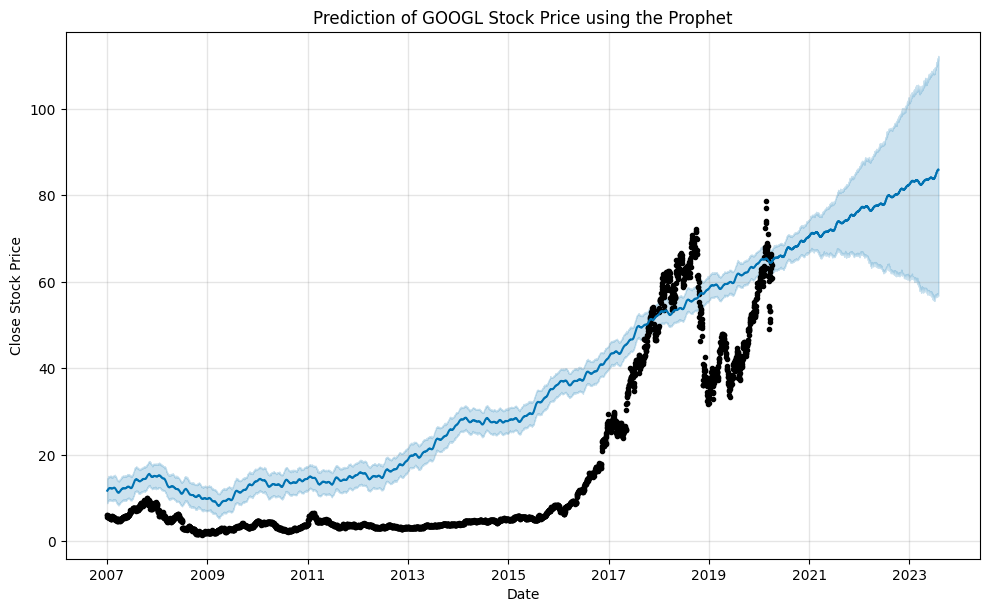

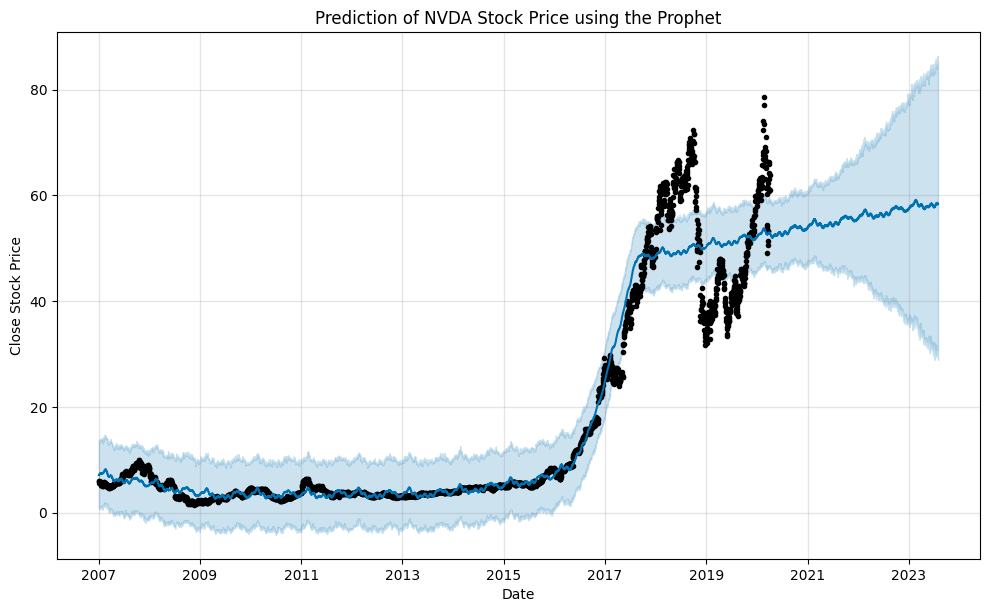

In [ ]:
for stock in stock_models:
  future = stock_models[stock].make_future_dataframe(periods=1214) #we need to specify the number of days in future
  predictions_dict[stock] = stock_models[stock].predict(future)

  m.plot(predictions_dict[stock])
  plt.title("Prediction of " + stock + " Stock Price using the Prophet")
  plt.xlabel("Date")
  plt.ylabel("Close Stock Price")
  plt.show()

In [ ]:
for stock in predictions_dict:
  # print(prediction)
  predictions_dict[stock] = predictions_dict[stock][predictions_dict[stock]['ds'].isin(stock_dict[stock].iloc[training_len:, :]["Date"])]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for stock in predictions_dict:
  print(predictions_dict[stock].tail())

             ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
4543 2023-07-24  97.949627   75.927216  123.160934    75.435373   123.476948   
4544 2023-07-25  97.977923   75.796306  123.539253    75.419177   123.527106   
4545 2023-07-26  98.006220   75.152336  125.726146    75.406960   123.577264   
4546 2023-07-27  98.034517   75.948442  125.284714    75.394744   123.627423   
4547 2023-07-28  98.062814   76.437315  124.885017    75.382528   123.677581   

      additive_terms  additive_terms_lower  additive_terms_upper     daily  \
4543        0.418913              0.418913              0.418913  0.606635   
4544        0.488265              0.488265              0.488265  0.606635   
4545        0.478338              0.478338              0.478338  0.606635   
4546        0.504671              0.504671              0.504671  0.606635   
4547        0.454525              0.454525              0.454525  0.606635   

      ...    weekly  weekly_lower  weekly_upper   

In [ ]:
# Importing functions from sklearn.metrics lib to calculate performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

In [ ]:
# Calculating RMSE values
rmse = {}

for stock in predictions_dict:
  rmse[stock] = np.sqrt(mean_squared_error(predictions_dict[stock]['yhat'], stock_dict[stock].iloc[training_len:, :]["Close"]))

print(rmse)

{'AAPL': 62.55228023579087, 'MSFT': 57.58151673627574, 'AMZN': 40.32964379535273, 'NFLX': 183.19046556403887, 'INFY': 6.118455155545986, 'ADBE': 132.38029566380675, 'GOOGL': 38.86777472641963, 'NVDA': 157.38126701384962}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculating MAE & MAPE values
mae = {}
mape = {}

for stock in predictions_dict:
    y_true = stock_dict[stock].iloc[training_len:, :]["Close"]
    y_pred = predictions_dict[stock]['yhat']

    # Calculate MAE
    mae[stock] = mean_absolute_error(y_pred, y_true)

    # Calculate MAPE
    mape[stock] = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Print the results
for stock in mae:
    print(f"Stock: {stock}")
    print(f"MAE: {mae[stock]:.2f}")
    print(f"MAPE: {mape[stock]:.2f}%")
    print("=" * 30)

Stock: AAPL
MAE: 59.19
MAPE: 44.23%
Stock: MSFT
MAE: 48.32
MAPE: 23.17%
Stock: AMZN
MAE: 37.43
MAPE: 25.77%
Stock: NFLX
MAE: 155.96
MAPE: 43.77%
Stock: INFY
MAE: 5.18
MAPE: 30.09%
Stock: ADBE
MAE: 116.76
MAPE: 23.25%
Stock: GOOGL
MAE: 32.51
MAPE: 30.16%
Stock: NVDA
MAE: 135.22
MAPE: 66.49%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predictions_dict["AAPL"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3339,2020-04-06,63.880282,60.038569,68.170013,63.880282,63.880282,0.265418,0.265418,0.265418,0.606635,...,0.005590,0.005590,0.005590,-0.346808,-0.346808,-0.346808,0.0,0.0,0.0,64.145699
3340,2020-04-07,63.908578,59.749289,68.367664,63.908578,63.908578,0.325739,0.325739,0.325739,0.606635,...,0.061471,0.061471,0.061471,-0.342367,-0.342367,-0.342367,0.0,0.0,0.0,64.234318
3341,2020-04-08,63.936875,59.953857,68.111387,63.936875,63.936875,0.308404,0.308404,0.308404,0.606635,...,0.039065,0.039065,0.039065,-0.337297,-0.337297,-0.337297,0.0,0.0,0.0,64.245279
3342,2020-04-09,63.965172,60.178245,68.574990,63.965172,63.965172,0.328865,0.328865,0.328865,0.606635,...,0.053582,0.053582,0.053582,-0.331352,-0.331352,-0.331352,0.0,0.0,0.0,64.294037
3346,2020-04-13,64.078359,60.296498,68.483866,64.078359,64.078359,0.317097,0.317097,0.317097,0.606635,...,0.005590,0.005590,0.005590,-0.295128,-0.295128,-0.295128,0.0,0.0,0.0,64.395456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,2023-07-24,97.949627,75.927216,123.160934,75.435373,123.476948,0.418913,0.418913,0.418913,0.606635,...,0.005590,0.005590,0.005590,-0.193312,-0.193312,-0.193312,0.0,0.0,0.0,98.368540
4544,2023-07-25,97.977923,75.796306,123.539253,75.419177,123.527106,0.488265,0.488265,0.488265,0.606635,...,0.061471,0.061471,0.061471,-0.179842,-0.179842,-0.179842,0.0,0.0,0.0,98.466188
4545,2023-07-26,98.006220,75.152336,125.726146,75.406960,123.577264,0.478338,0.478338,0.478338,0.606635,...,0.039065,0.039065,0.039065,-0.167362,-0.167362,-0.167362,0.0,0.0,0.0,98.484559
4546,2023-07-27,98.034517,75.948442,125.284714,75.394744,123.627423,0.504671,0.504671,0.504671,0.606635,...,0.053582,0.053582,0.053582,-0.155546,-0.155546,-0.155546,0.0,0.0,0.0,98.539188


Plotting Graph using Matplotlib and doing comparison

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-30-fd575c3e2529>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict[stock]["yhat"]


AAPL-


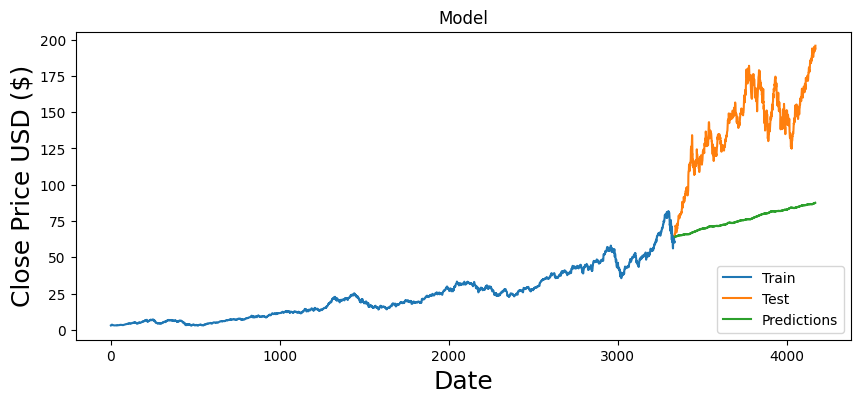

<ipython-input-30-fd575c3e2529>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict[stock]["yhat"]


MSFT-


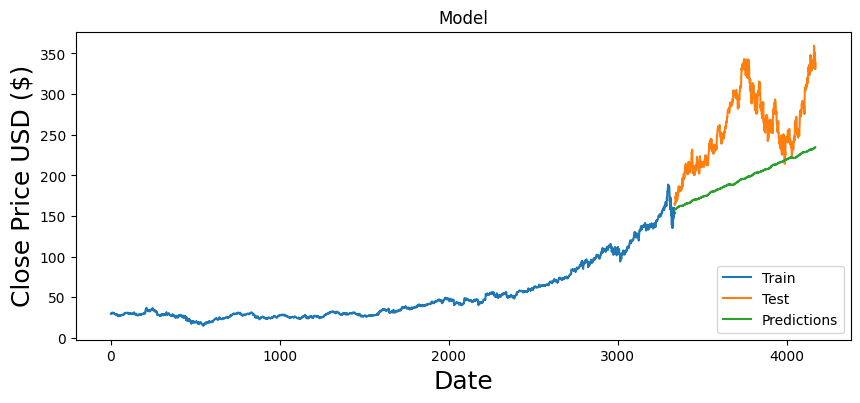

<ipython-input-30-fd575c3e2529>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict[stock]["yhat"]


AMZN-


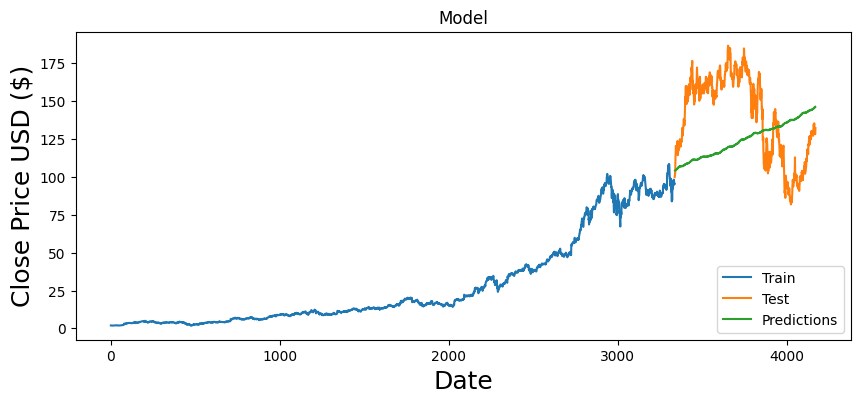

<ipython-input-30-fd575c3e2529>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict[stock]["yhat"]


NFLX-


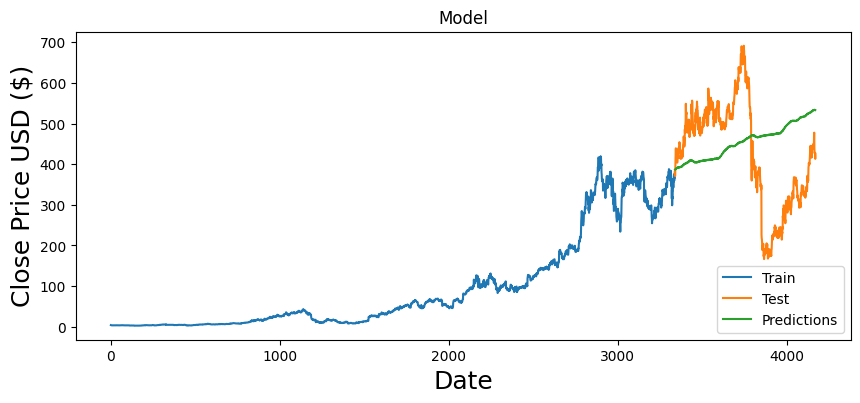

<ipython-input-30-fd575c3e2529>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict[stock]["yhat"]


INFY-


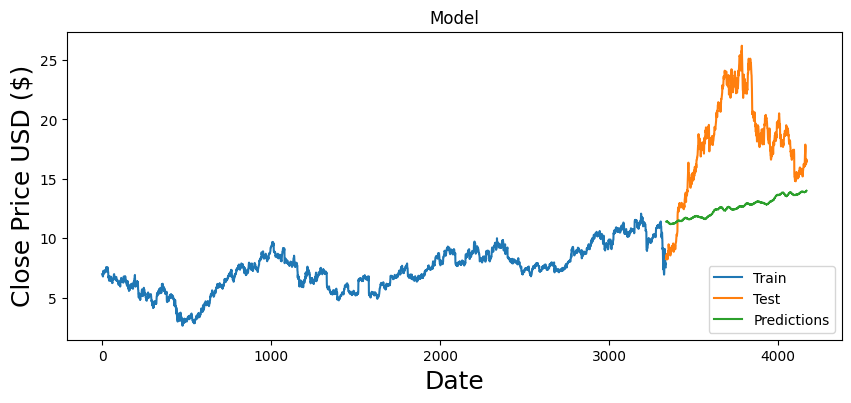

<ipython-input-30-fd575c3e2529>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict[stock]["yhat"]


ADBE-


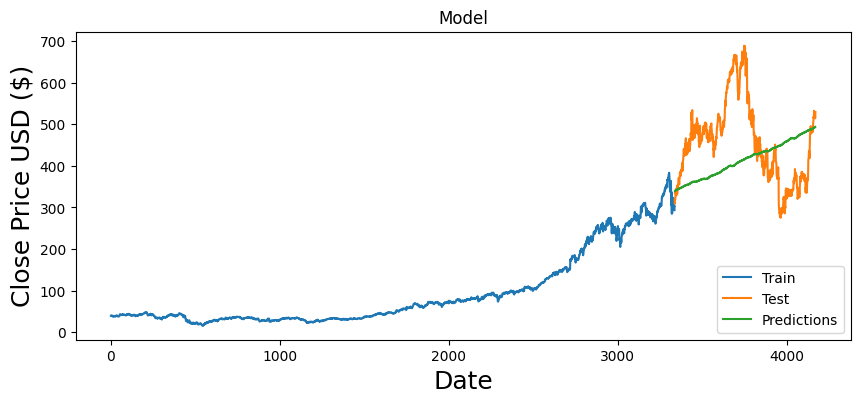

<ipython-input-30-fd575c3e2529>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict[stock]["yhat"]


GOOGL-


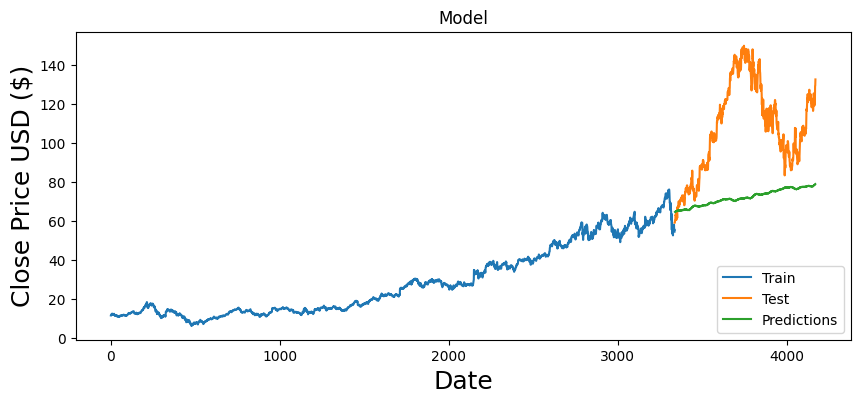

<ipython-input-30-fd575c3e2529>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict[stock]["yhat"]


NVDA-


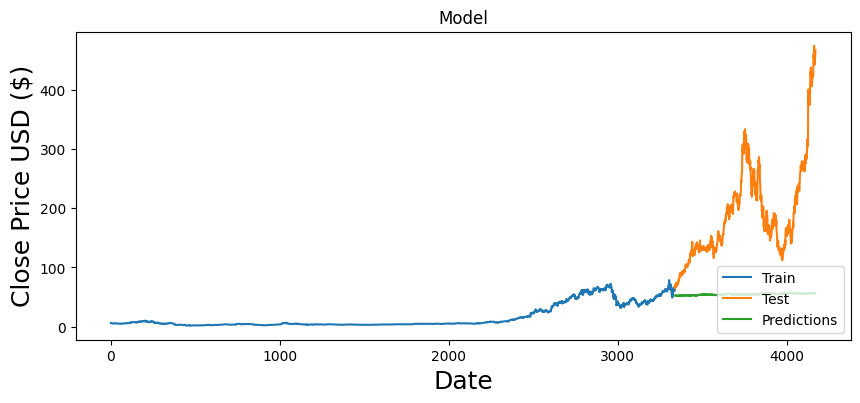

In [ ]:
for stock in predictions_dict:
  #Creating a new dataframe with only the 'Close' column
  data = stock_dict[stock].filter(['Close'])

  #Plot/Create the data for the graph
  train = data[:training_len]
  valid = data[training_len:]
  valid['Predictions'] = predictions_dict[stock]["yhat"]

  #Visualize the data
  print(stock + "-")
  plt.figure(figsize=(10,4))
  plt.title('Model')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
  plt.show()

# Case 2: Small Datasets

In [ ]:
start = "2023-01-01"
end = "2023-07-31"

# Convert start and end dates to datetime objects
start_date = datetime.strptime(start, "%Y-%m-%d")
end_date = datetime.strptime(end, "%Y-%m-%d")

# Set up the data reader with Yahoo Finance
yf.pdr_override()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Making stock dictionary to be able to call any stock easily
stock_dict_small = {}
for stock in stock_types:
  stock_dict_small[stock] = None

### Importing dataset from yahoo finance

In [ ]:
for stock in stock_dict_small:
  # Fetch the data using DataReader
  df = pdr.get_data_yahoo(stock, start=start_date, end=end_date)
  df = df.reset_index()

  if df is not None:
    stock_dict_small[stock] = df
    print(stock + "-" )
    print(df.head())  # Display the first few rows of the loaded data

[*********************100%%**********************]  1 of 1 completed
AAPL-
        Date        Open        High         Low       Close   Adj Close  \
0 2023-01-03  130.279999  130.899994  124.169998  125.070000  124.538658   
1 2023-01-04  126.889999  128.660004  125.080002  126.360001  125.823189   
2 2023-01-05  127.129997  127.769997  124.760002  125.019997  124.488869   
3 2023-01-06  126.010002  130.289993  124.889999  129.619995  129.069336   
4 2023-01-09  130.470001  133.410004  129.889999  130.149994  129.597076   

      Volume  
0  112117500  
1   89113600  
2   80962700  
3   87754700  
4   70790800  
[*********************100%%**********************]  1 of 1 completed
MSFT-
        Date        Open        High         Low       Close   Adj Close  \
0 2023-01-03  243.080002  245.750000  237.399994  239.580002  237.956329   
1 2023-01-04  232.279999  232.869995  225.960007  229.100006  227.547363   
2 2023-01-05  227.199997  227.550003  221.759995  222.309998  220.803360   

Splliting training and Testing Data

In [ ]:
# Finding training dataset size and splitting accordingly
training_len_small = math.ceil(0.8 * stock_dict_small["AAPL"].shape[0])
training_len_small

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


115

In [ ]:
stock_dict_small["AAPL"]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,130.279999,130.899994,124.169998,125.070000,124.538658,112117500
1,2023-01-04,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,124.488869,80962700
3,2023-01-06,126.010002,130.289993,124.889999,129.619995,129.069336,87754700
4,2023-01-09,130.470001,133.410004,129.889999,130.149994,129.597076,70790800
...,...,...,...,...,...,...,...
138,2023-07-24,193.410004,194.910004,192.250000,192.750000,192.490067,45377800
139,2023-07-25,193.330002,194.440002,192.919998,193.619995,193.358887,37283200
140,2023-07-26,193.669998,195.639999,193.320007,194.500000,194.237701,47471900
141,2023-07-27,196.020004,197.199997,192.550003,193.220001,192.959427,47460200


In [ ]:
stock_training_dict_small = {}

for stock in stock_dict_small:
  stock_training_dict_small[stock] = stock_dict_small[stock].iloc[0:training_len_small, : ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stock_training_dict_small["AAPL"]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,130.279999,130.899994,124.169998,125.070000,124.538658,112117500
1,2023-01-04,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,124.488869,80962700
3,2023-01-06,126.010002,130.289993,124.889999,129.619995,129.069336,87754700
4,2023-01-09,130.470001,133.410004,129.889999,130.149994,129.597076,70790800
...,...,...,...,...,...,...,...
110,2023-06-12,181.270004,183.889999,180.970001,183.789993,183.542145,54274900
111,2023-06-13,182.800003,184.149994,182.440002,183.309998,183.062790,54929100
112,2023-06-14,183.369995,184.389999,182.020004,183.949997,183.701935,57462900
113,2023-06-15,183.960007,186.520004,183.779999,186.009995,185.759155,65433200


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AAPL -


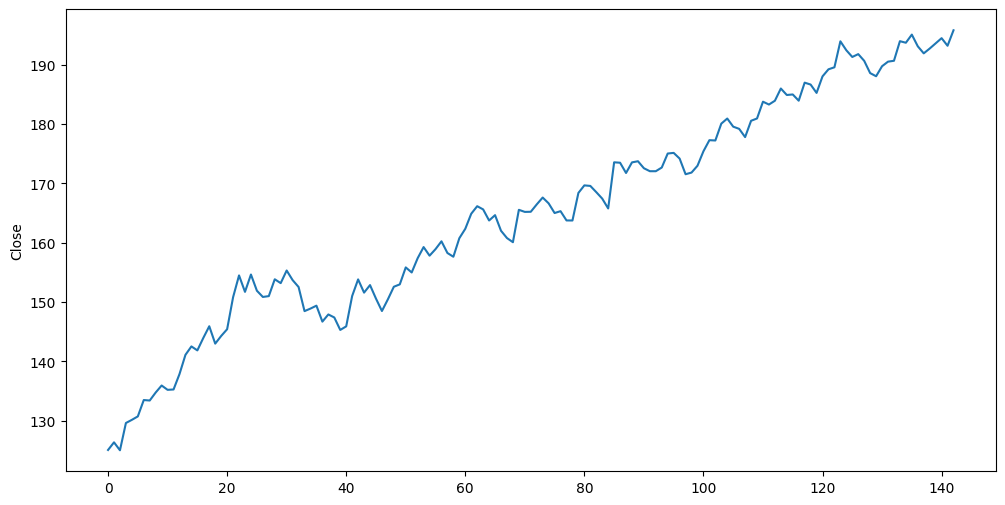

MSFT -


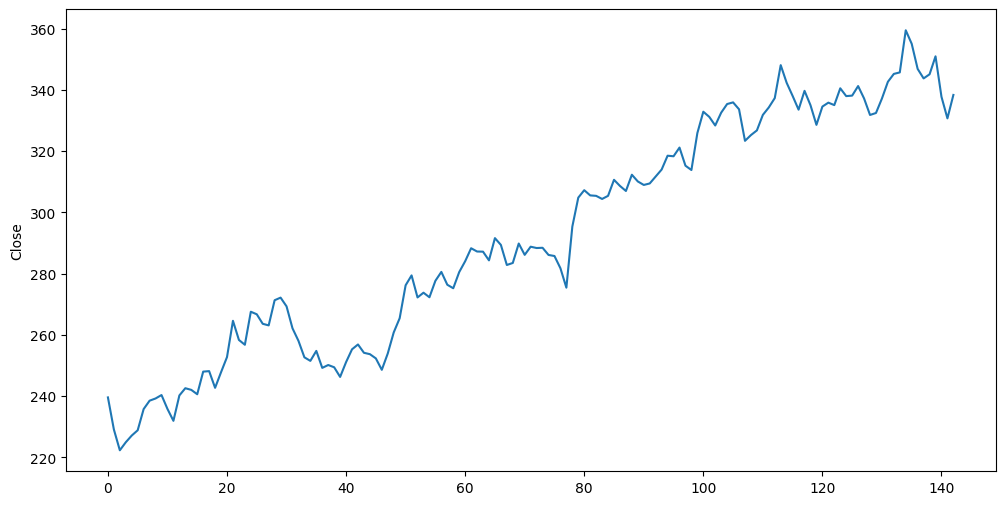

AMZN -


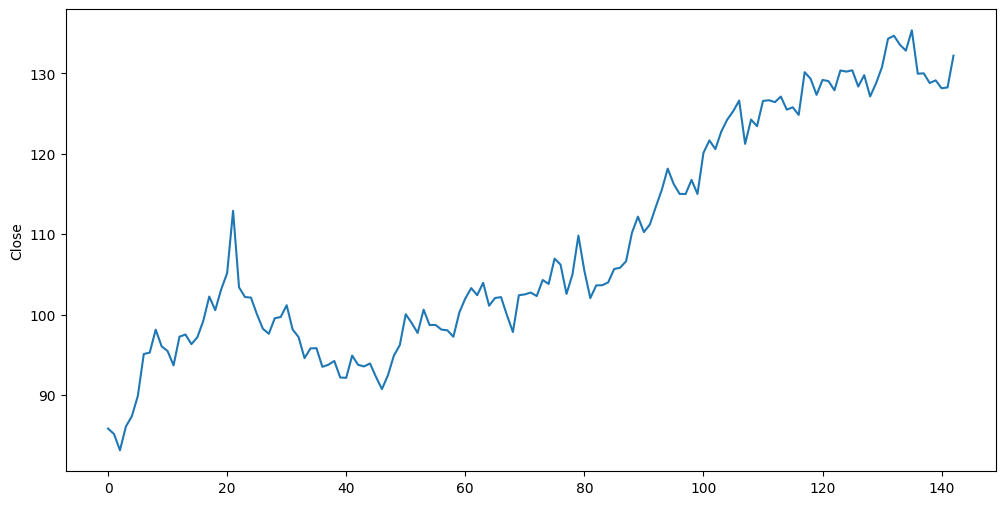

NFLX -


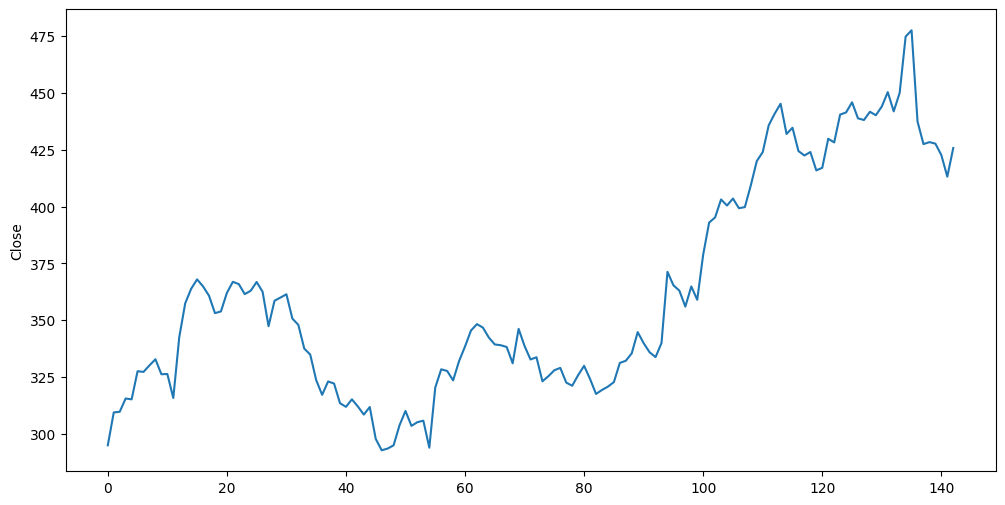

INFY -


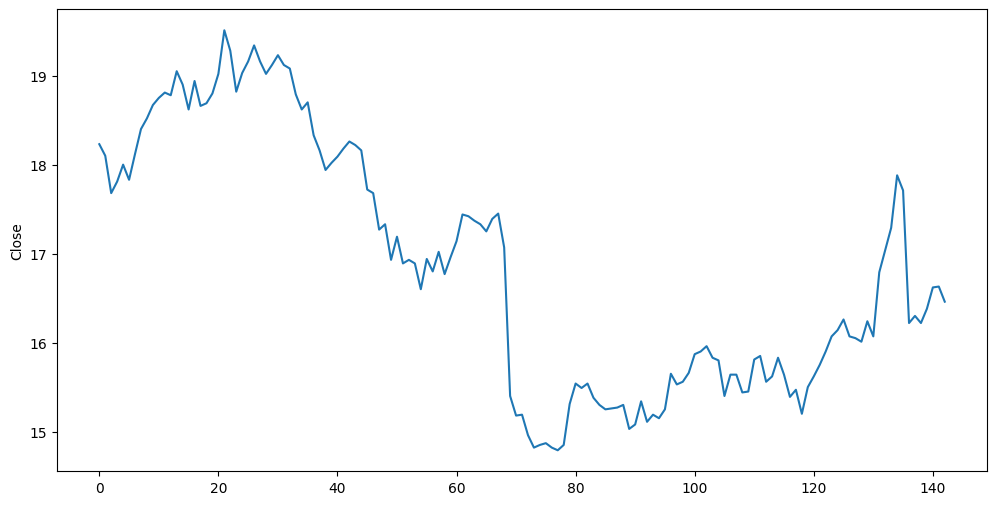

ADBE -


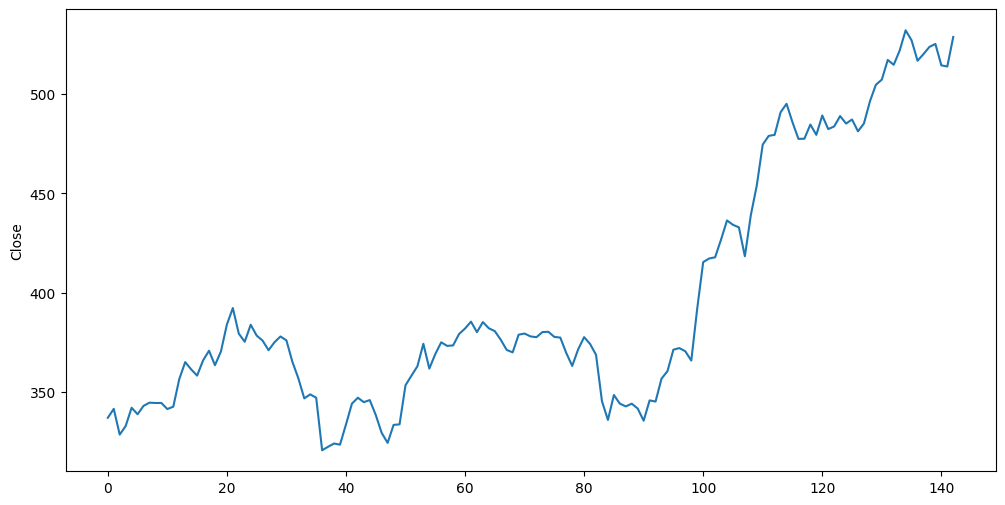

GOOGL -


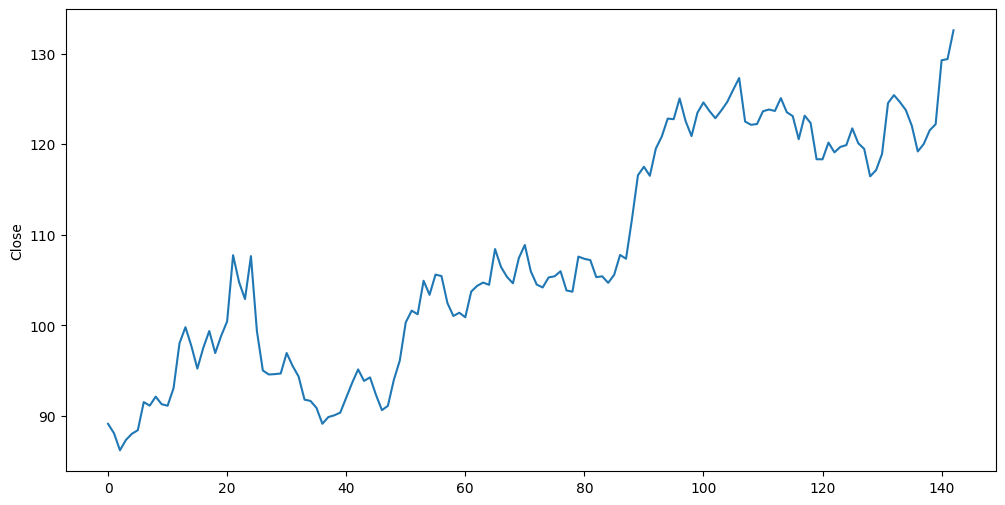

NVDA -


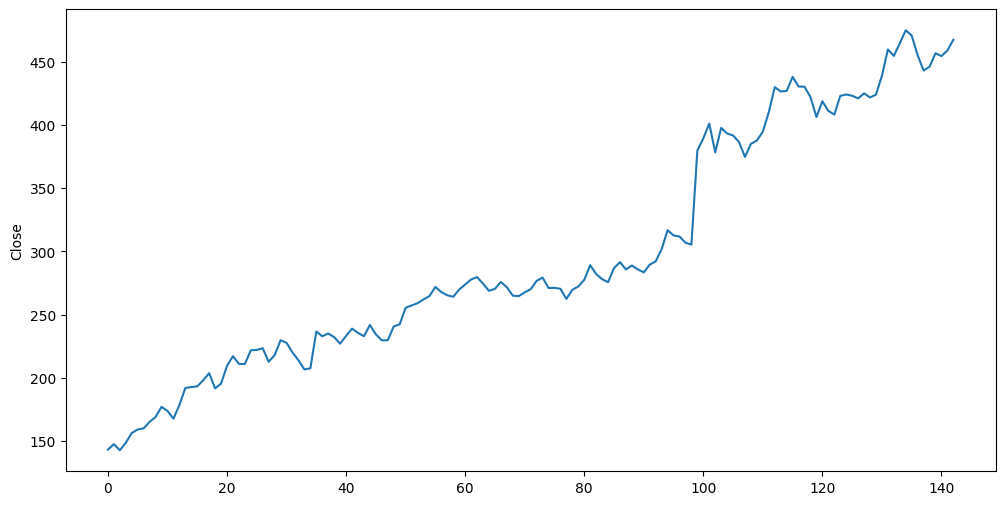

In [ ]:
# Plotting graph of each stock
for stock in stock_training_dict_small:
  # here we are visualising of closing price
  plt.figure(figsize=(12, 6))

  print(stock + ' -')

  stock_dict_small[stock]['Close'].plot()
  plt.ylabel('Close')
  plt.xlabel(None)
  plt.show()

### Making data according to prophet model

In [ ]:
for stock in stock_training_dict_small:
  # Select only the important features i.e. the date and price
  stock_training_dict_small[stock] = stock_training_dict_small[stock][["Date","Close"]] # select Date and Price
  # Rename the features: These names are NEEDED for the model fitting
  stock_training_dict_small[stock] = stock_training_dict_small[stock].rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset

  print(stock + ' -')
  print(stock_training_dict_small[stock].head())

AAPL -
          ds           y
0 2023-01-03  125.070000
1 2023-01-04  126.360001
2 2023-01-05  125.019997
3 2023-01-06  129.619995
4 2023-01-09  130.149994
MSFT -
          ds           y
0 2023-01-03  239.580002
1 2023-01-04  229.100006
2 2023-01-05  222.309998
3 2023-01-06  224.929993
4 2023-01-09  227.119995
AMZN -
          ds          y
0 2023-01-03  85.820000
1 2023-01-04  85.139999
2 2023-01-05  83.120003
3 2023-01-06  86.080002
4 2023-01-09  87.360001
NFLX -
          ds           y
0 2023-01-03  294.950012
1 2023-01-04  309.410004
2 2023-01-05  309.700012
3 2023-01-06  315.549988
4 2023-01-09  315.170013
INFY -
          ds          y
0 2023-01-03  18.230000
1 2023-01-04  18.100000
2 2023-01-05  17.680000
3 2023-01-06  17.809999
4 2023-01-09  18.000000
ADBE -
          ds           y
0 2023-01-03  336.920013
1 2023-01-04  341.410004
2 2023-01-05  328.440002
3 2023-01-06  332.750000
4 2023-01-09  341.980011
GOOGL -
          ds          y
0 2023-01-03  89.120003
1 2023-01-04  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stock_models_small = {}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Trining on small Dataset
for stock in stock_training_dict_small:

  m = Prophet(daily_seasonality = True) # the Prophet class (model)
  m.fit(stock_training_dict_small[stock]) # fit the model using all data

  stock_models_small[stock] = m

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwaqxwygz/pjs2tr3c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwaqxwygz/n92t18ul.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5584', 'data', 'file=/tmp/tmpwaqxwygz/pjs2tr3c.json', 'init=/tmp/tmpwaqxwygz/n92t18ul.json', 'output', 'file=/tmp/tmpwaqxwygz/prophet_model7h28bx5l/prophet_model-20230830055552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:55:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:55:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tm

In [ ]:
predictions_dict_small = {}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


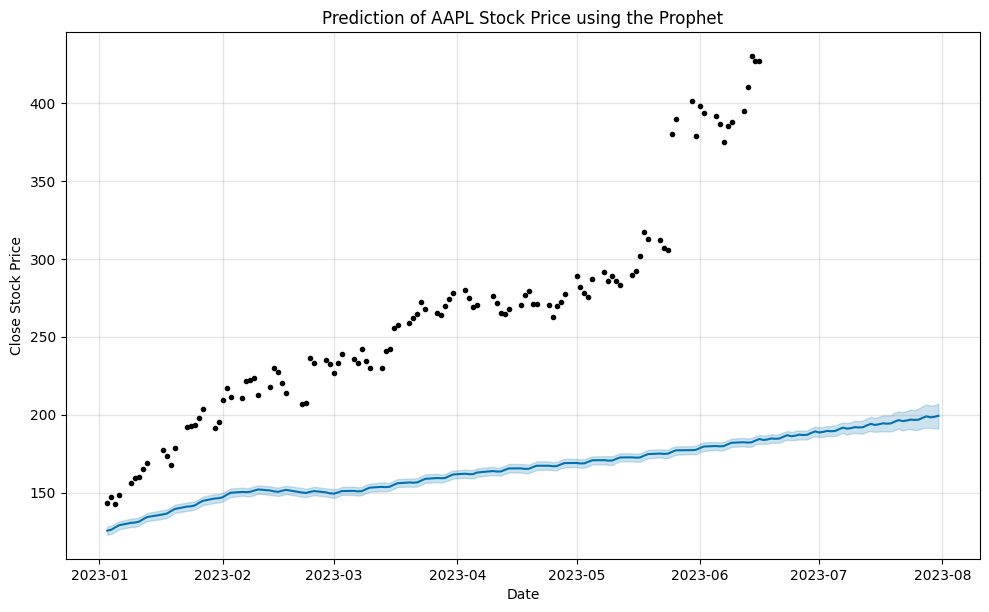

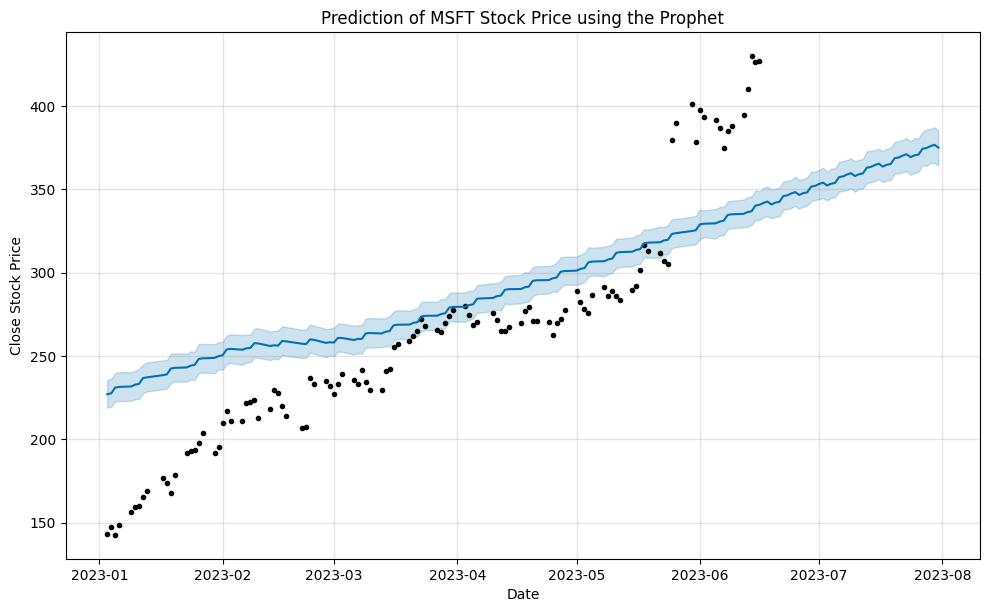

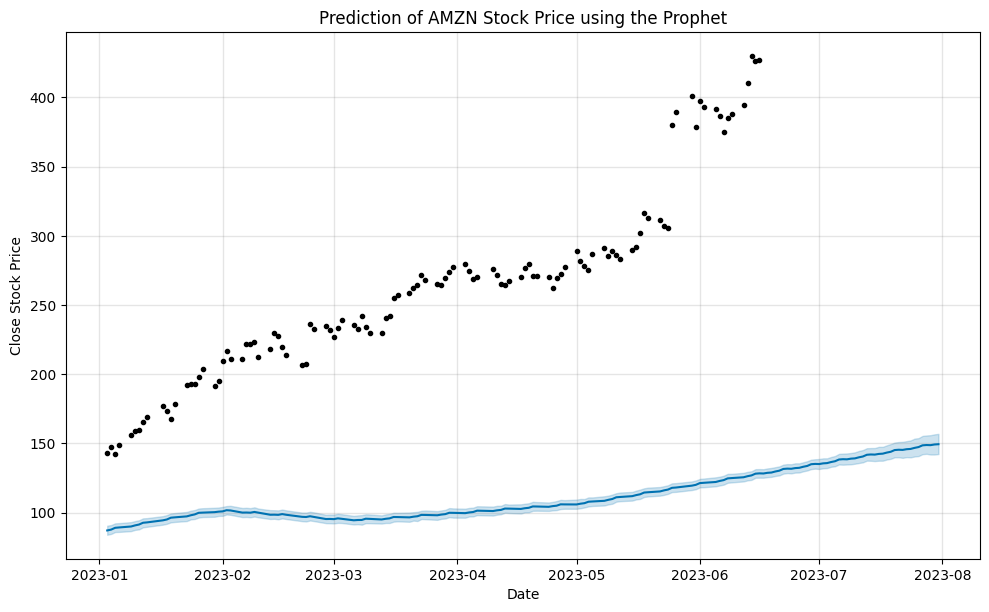

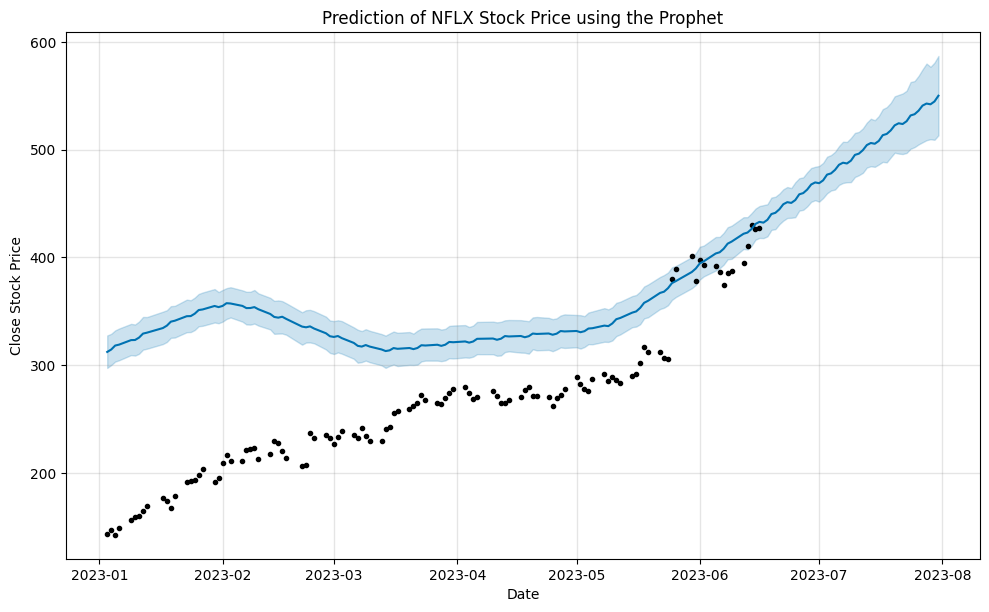

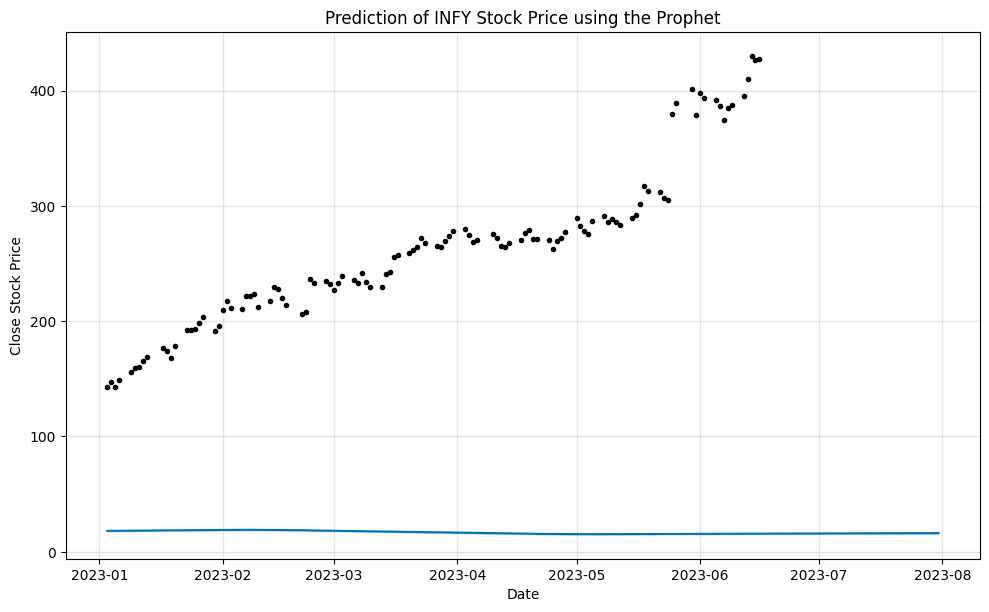

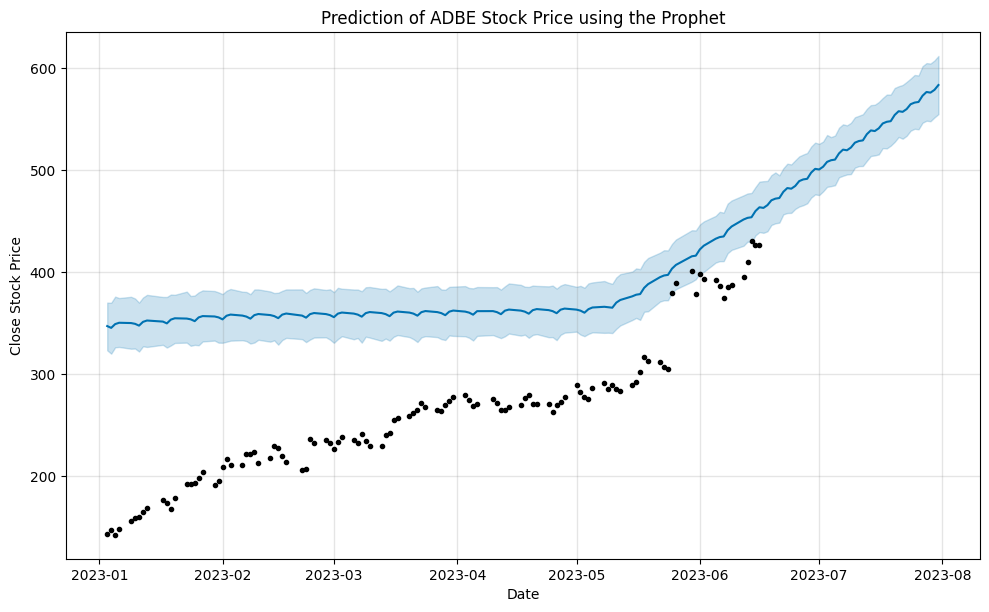

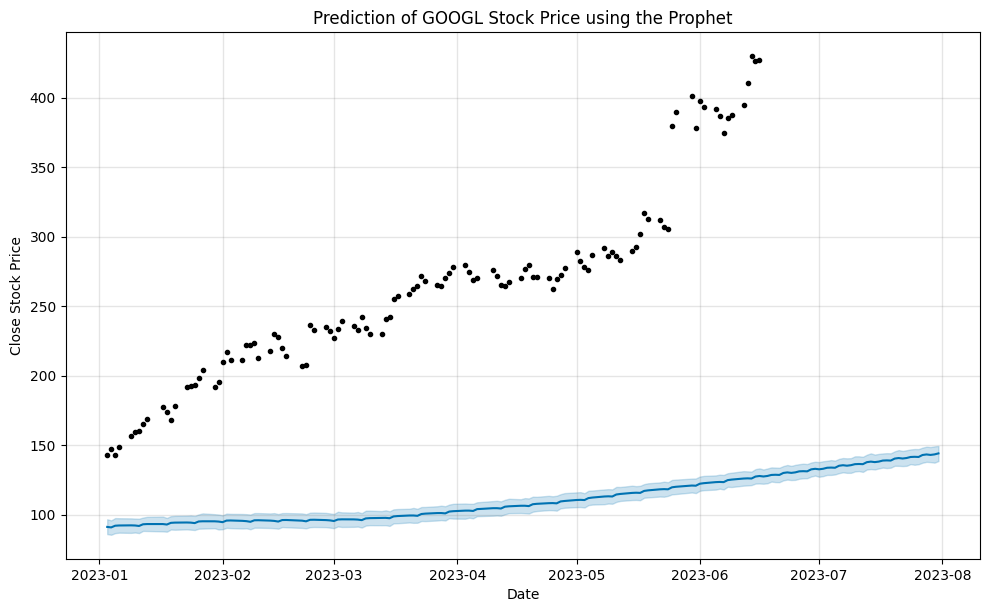

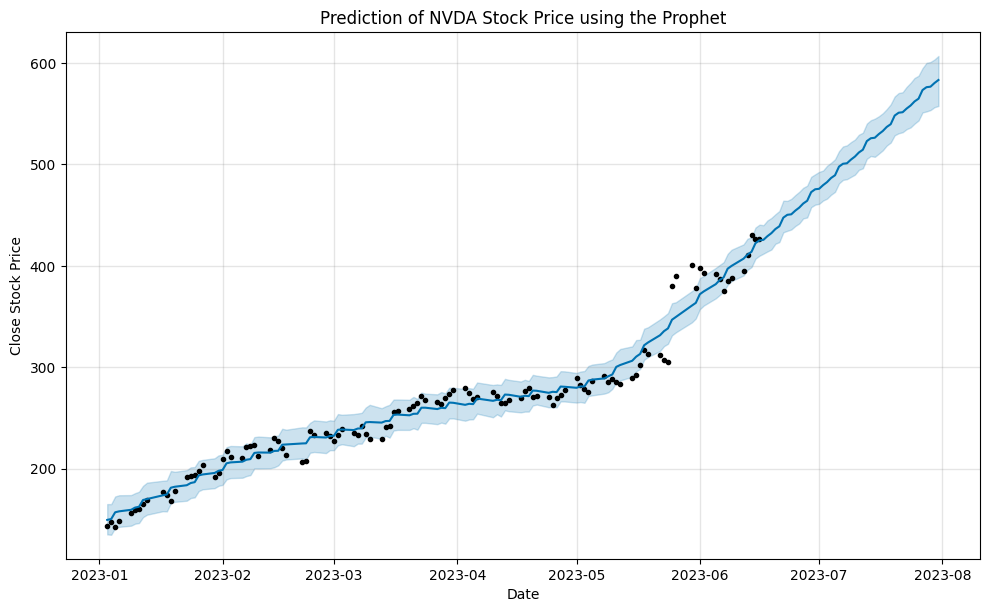

In [ ]:
for stock in stock_models_small:
  future = stock_models_small[stock].make_future_dataframe(periods=45) #we need to specify the number of days in future
  predictions_dict_small[stock] = stock_models_small[stock].predict(future)

  m.plot(predictions_dict_small[stock])
  plt.title("Prediction of " + stock + " Stock Price using the Prophet")
  plt.xlabel("Date")
  plt.ylabel("Close Stock Price")
  plt.show()

In [ ]:
# Taking only those predictions that are also in test dataset
for stock in predictions_dict_small:
  predictions_dict_small[stock] = predictions_dict_small[stock][predictions_dict_small[stock]['ds'].isin(stock_dict_small[stock].iloc[training_len_small:, :]["Date"])]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for stock in predictions_dict_small:
  print(predictions_dict_small[stock].tail())

            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
152 2023-07-24  195.627010  190.629062  203.323156   189.867879   201.375671   
153 2023-07-25  195.972978  190.104666  202.865106   190.029421   201.979354   
154 2023-07-26  196.318947  190.362951  203.916696   190.207284   202.584205   
155 2023-07-27  196.664915  191.332166  205.416376   190.413376   203.122133   
156 2023-07-28  197.010883  191.612236  206.517741   190.618709   203.721998   

     additive_terms  additive_terms_lower  additive_terms_upper     daily  \
152        1.217483              1.217483              1.217483  1.055168   
153        0.653324              0.653324              0.653324  1.055168   
154        0.471905              0.471905              0.471905  1.055168   
155        1.272627              1.272627              1.272627  1.055168   
156        1.924292              1.924292              1.924292  1.055168   

     daily_lower  daily_upper    weekly  weekly_lower  w

In [ ]:
# Calculating RMSE values
rmse_small = {}

for stock in predictions_dict_small:
  rmse_small[stock] = np.sqrt(mean_squared_error(predictions_dict_small[stock]['yhat'], stock_dict_small[stock].iloc[training_len_small:, :]["Close"]))

print(rmse_small)

{'AAPL': 2.5915302799920594, 'MSFT': 20.59149595642471, 'AMZN': 10.890715276179169, 'NFLX': 65.57973706708633, 'INFY': 0.6288055027365734, 'ADBE': 28.41686257266946, 'GOOGL': 14.622014411891868, 'NVDA': 75.28945426101055}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculating MAE & MAPE values
mae_small = {}
mape_small = {}

for stock in predictions_dict_small:
    y_true = stock_dict_small[stock].iloc[training_len_small:, :]["Close"]
    y_pred = predictions_dict_small[stock]['yhat']

    # Calculate MAE
    mae_small[stock] = mean_absolute_error(y_pred, y_true)

    # Calculate MAPE
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mape_small[stock] = mape

# Print the results
for stock in rmse_small:
    print(f"Stock: {stock}")
    print(f"MAE: {mae_small[stock]:.2f}")
    print(f"MAPE: {mape_small[stock]:.2f}%")
    print("=" * 30)

Stock: AAPL
MAE: 2.20
MAPE: 1.27%
Stock: MSFT
MAE: 18.49
MAPE: 3.69%
Stock: AMZN
MAE: 9.55
MAPE: 4.40%
Stock: NFLX
MAE: 57.40
MAPE: 8.71%
Stock: INFY
MAE: 0.43
MAPE: 3.53%
Stock: ADBE
MAE: 24.00
MAPE: 1.76%
Stock: GOOGL
MAE: 14.03
MAPE: 8.73%
Stock: NVDA
MAE: 68.94
MAPE: 9.20%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predictions_dict_small["AAPL"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
118,2023-06-20,183.864095,182.003823,187.230683,183.736567,183.968850,0.653324,0.653324,0.653324,1.055168,1.055168,1.055168,-0.401844,-0.401844,-0.401844,0.0,0.0,0.0,184.517419
119,2023-06-21,184.210063,181.946982,187.526999,184.008879,184.391583,0.471905,0.471905,0.471905,1.055168,1.055168,1.055168,-0.583263,-0.583263,-0.583263,0.0,0.0,0.0,184.681969
120,2023-06-22,184.556032,183.119029,188.657217,184.271093,184.813520,1.272627,1.272627,1.272627,1.055168,1.055168,1.055168,0.217459,0.217459,0.217459,0.0,0.0,0.0,185.828658
121,2023-06-23,184.902000,183.914289,189.492373,184.533744,185.246392,1.924292,1.924292,1.924292,1.055168,1.055168,1.055168,0.869125,0.869125,0.869125,0.0,0.0,0.0,186.826292
124,2023-06-26,185.939904,184.164696,189.884417,185.265332,186.600113,1.217483,1.217483,1.217483,1.055168,1.055168,1.055168,0.162315,0.162315,0.162315,0.0,0.0,0.0,187.157387
125,2023-06-27,186.285872,184.038537,189.803859,185.491869,187.065658,0.653324,0.653324,0.653324,1.055168,1.055168,1.055168,-0.401844,-0.401844,-0.401844,0.0,0.0,0.0,186.939196
126,2023-06-28,186.631840,184.132672,189.864158,185.705148,187.523071,0.471905,0.471905,0.471905,1.055168,1.055168,1.055168,-0.583263,-0.583263,-0.583263,0.0,0.0,0.0,187.103745
127,2023-06-29,186.977808,185.373263,191.217506,185.901762,188.007801,1.272627,1.272627,1.272627,1.055168,1.055168,1.055168,0.217459,0.217459,0.217459,0.0,0.0,0.0,188.250435
128,2023-06-30,187.323776,186.100725,192.252263,186.092131,188.478858,1.924292,1.924292,1.924292,1.055168,1.055168,1.055168,0.869125,0.869125,0.869125,0.0,0.0,0.0,189.248069
131,2023-07-03,188.361681,186.335539,192.589196,186.837581,189.948361,1.217483,1.217483,1.217483,1.055168,1.055168,1.055168,0.162315,0.162315,0.162315,0.0,0.0,0.0,189.579164


In [ ]:
predictions_dict_small_2 = {}

for stock in stock_models_small:
  future2 = stock_models_small[stock].make_future_dataframe(periods=45) #we need to specify the number of days in future
  predictions_dict_small_2[stock] = stock_models_small[stock].predict(future)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-50-e0abd650e2f2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict_small_2[stock]["yhat"]


AAPL-


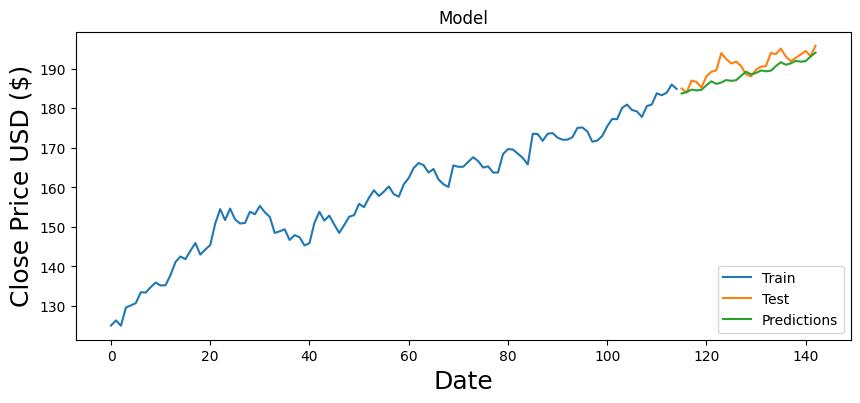

<ipython-input-50-e0abd650e2f2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict_small_2[stock]["yhat"]


MSFT-


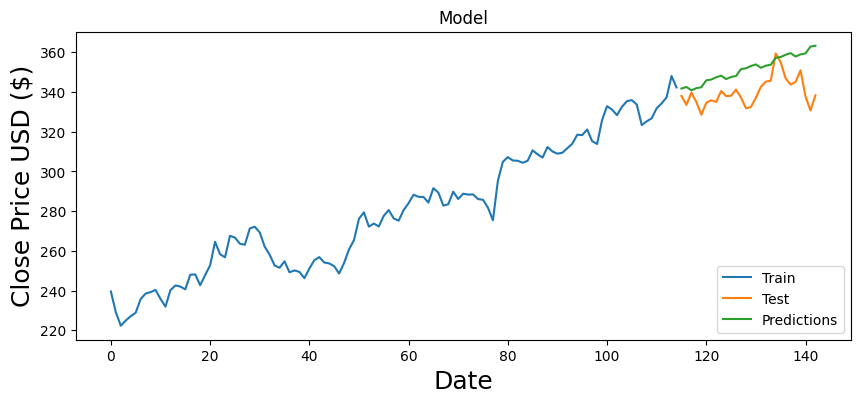

<ipython-input-50-e0abd650e2f2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict_small_2[stock]["yhat"]


AMZN-


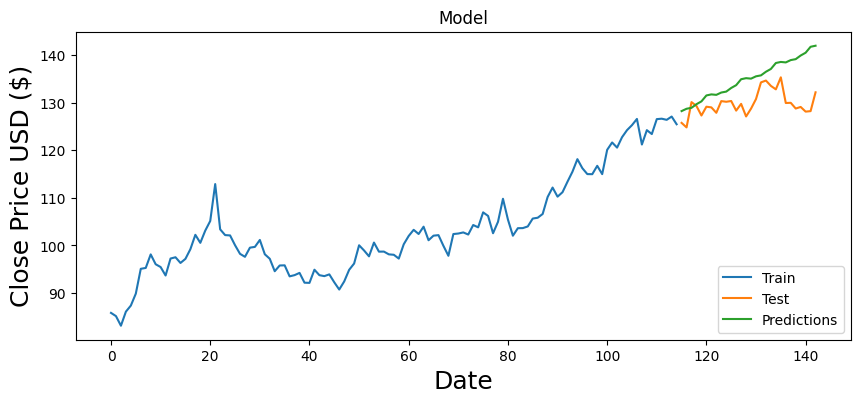

<ipython-input-50-e0abd650e2f2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict_small_2[stock]["yhat"]


NFLX-


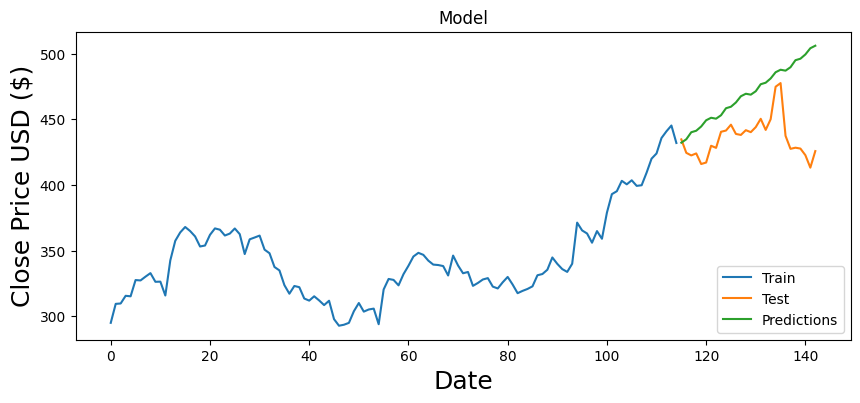

<ipython-input-50-e0abd650e2f2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict_small_2[stock]["yhat"]


INFY-


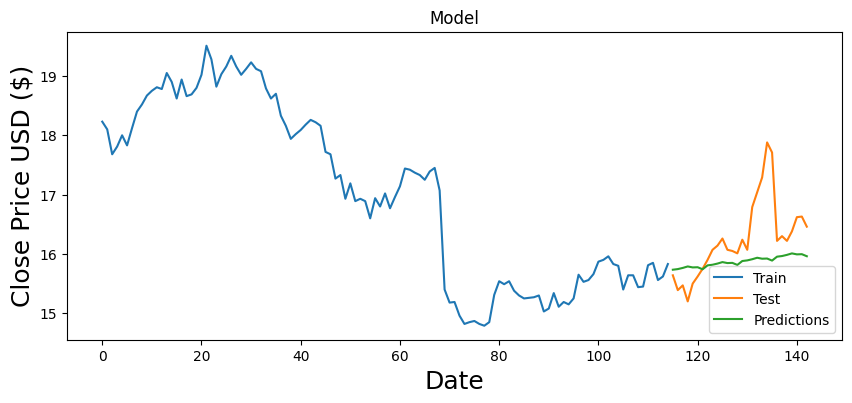

<ipython-input-50-e0abd650e2f2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict_small_2[stock]["yhat"]


ADBE-


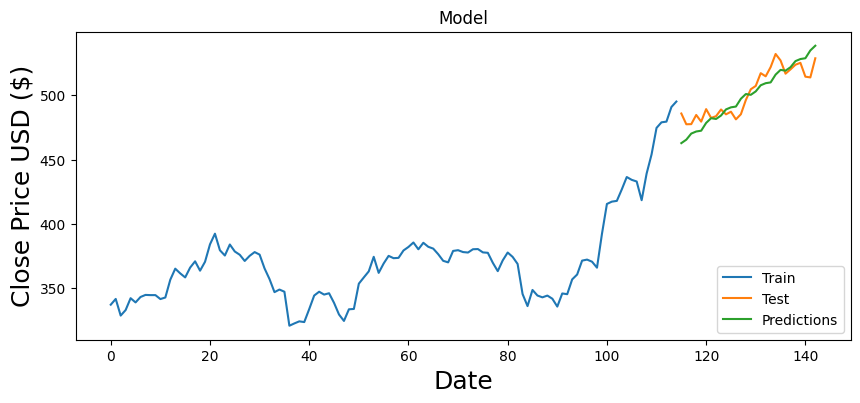

<ipython-input-50-e0abd650e2f2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict_small_2[stock]["yhat"]


GOOGL-


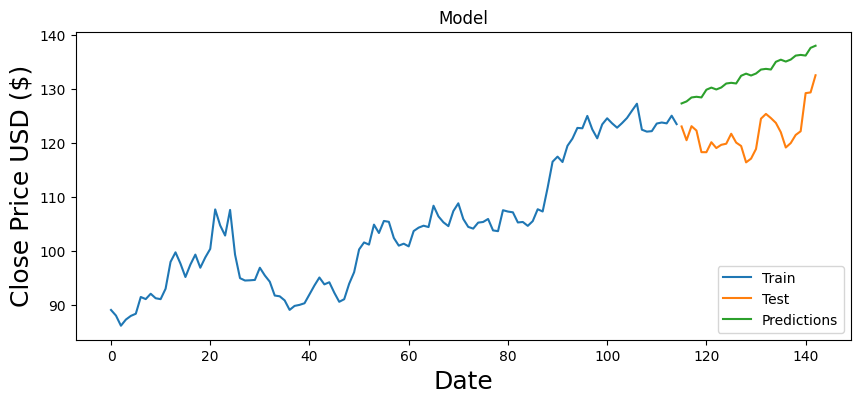

<ipython-input-50-e0abd650e2f2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict_small_2[stock]["yhat"]


NVDA-


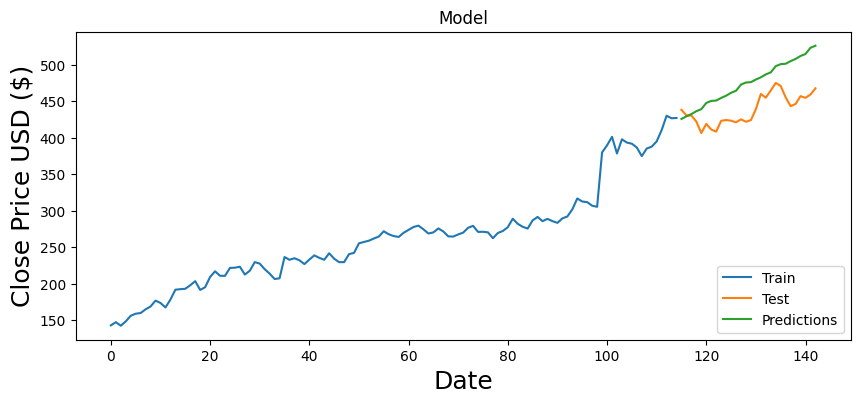

In [ ]:
for stock in predictions_dict_small:
  #Creating a new dataframe with only the 'Close' column
  data = stock_dict_small[stock].filter(['Close'])

  #Plot/Create the data for the graph
  train = data[:training_len_small]
  valid = data[training_len_small:]
  valid['Predictions'] = predictions_dict_small_2[stock]["yhat"]

  #Visualize the data
  print(stock + "-")
  plt.figure(figsize=(10,4))
  plt.title('Model')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
